In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('/content/ageincom.xlsx')
df.head(30)

,Name,Age,Income
0,Rob,27.0,70000.0
1,Michael,29.0,90000.0
2,Mohan,29.0,61000.0
3,Ismail,28.0,60000.0
4,Kory,42.0,150000.0
5,Gautam,39.0,155000.0
6,David,41.0,160000.0
7,Andrea,38.0,162000.0
8,Brad,36.0,156000.0
9,Angelina,35.0,130000.0


In [3]:
df.dropna(axis=0 , inplace=True)
df.head(30)

,Name,Age,Income
0,Rob,27.0,70000.0
1,Michael,29.0,90000.0
2,Mohan,29.0,61000.0
3,Ismail,28.0,60000.0
4,Kory,42.0,150000.0
5,Gautam,39.0,155000.0
6,David,41.0,160000.0
7,Andrea,38.0,162000.0
8,Brad,36.0,156000.0
9,Angelina,35.0,130000.0


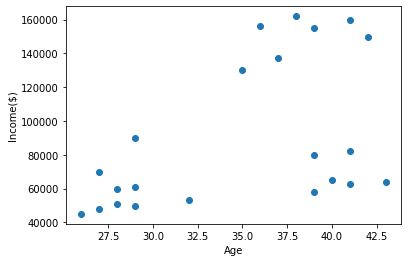

In [4]:
plt.scatter(df.Age , df.Income)
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27.0,70000.0,0
1,Michael,29.0,90000.0,0
2,Mohan,29.0,61000.0,2
3,Ismail,28.0,60000.0,2
4,Kory,42.0,150000.0,1


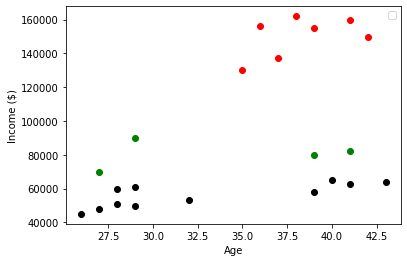

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

###***Preprocessing using min max scaler***

In [8]:
scaler = StandardScaler()
scaler.fit(df[['Income']])
scaler.fit(df[['Age']])

StandardScaler()

In [9]:
df['scaled_Income'] = scaler.transform(df[['Income']])
df['scaled_Age'] = scaler.transform(df[['Age']])
df.head(30)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Income
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)


,Name,Age,Income,cluster,scaled_Income,scaled_Age
0,Rob,27.0,70000.0,0,12135.386678,-1.356055
1,Michael,29.0,90000.0,0,15604.365493,-1.009157
2,Mohan,29.0,61000.0,2,10574.346211,-1.009157
3,Ismail,28.0,60000.0,2,10400.897270,-1.182606
4,Kory,42.0,150000.0,1,26011.301940,1.245679
5,Gautam,39.0,155000.0,1,26878.546644,0.725332
6,David,41.0,160000.0,1,27745.791348,1.072230
7,Andrea,38.0,162000.0,1,28092.689229,0.551883
8,Brad,36.0,156000.0,1,27051.995585,0.204985
9,Angelina,35.0,130000.0,1,22542.323124,0.031536


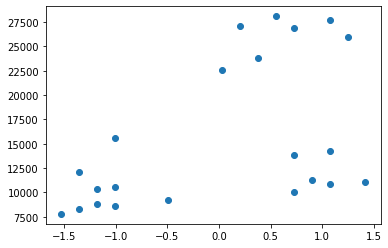

In [10]:
plt.scatter(df.scaled_Age , df.scaled_Income)

In [11]:
km = KMeans(n_clusters=3)
y_predicted_scaled = km.fit_predict(df[['scaled_Age','scaled_Income']])
y_predicted_scaled

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [12]:
df['cluster_scaled'] = y_predicted_scaled
df.head(30)

,Name,Age,Income,cluster,scaled_Income,scaled_Age,cluster_scaled
0,Rob,27.0,70000.0,0,12135.386678,-1.356055,2
1,Michael,29.0,90000.0,0,15604.365493,-1.009157,2
2,Mohan,29.0,61000.0,2,10574.346211,-1.009157,0
3,Ismail,28.0,60000.0,2,10400.897270,-1.182606,0
4,Kory,42.0,150000.0,1,26011.301940,1.245679,1
5,Gautam,39.0,155000.0,1,26878.546644,0.725332,1
6,David,41.0,160000.0,1,27745.791348,1.072230,1
7,Andrea,38.0,162000.0,1,28092.689229,0.551883,1
8,Brad,36.0,156000.0,1,27051.995585,0.204985,1
9,Angelina,35.0,130000.0,1,22542.323124,0.031536,1


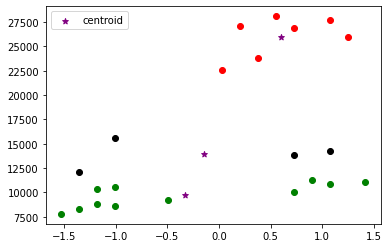

In [15]:
df1 = df[df.cluster_scaled==0]
df2 = df[df.cluster_scaled==1]
df3 = df[df.cluster_scaled==2]
plt.scatter(df1.scaled_Age,df1['scaled_Income'],color='green')
plt.scatter(df2.scaled_Age,df2['scaled_Income'],color='red')
plt.scatter(df3.scaled_Age,df3['scaled_Income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [14]:
km.cluster_centers_ # it Represents the centroids of the 3 Clusters (x , y)

array([[-3.31129796e-01,  9.73075364e+03],
       [ 6.01439834e-01,  2.60113019e+04],
       [-1.41912770e-01,  1.39566006e+04]])

###***Elbow Plot***

In [16]:
k_rng = range(1,11)
sse = [] #Sum of Squared Error
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['scaled_Age' , 'scaled_Income']])
  sse.append(km.inertia_) #Calculating the Sum of Squared Error(SSE)

In [17]:
sse

[1195804565.7593236,
 99827525.3308281,
 47444697.44526533,
 24511255.93107906,
 8920077.222656338,
 7200242.2255925685,
 5272828.47825294,
 3599121.64788248,
 2862050.4788123644,
 2049763.3967429115]

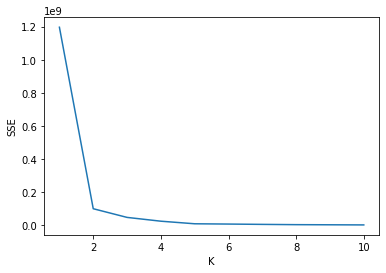

In [18]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)
plt.show()

With the elbow method we can see that K=2 is our ***Elbow*** and it's the optimal Number of K 